# Enron POI Classifier EDA

## Initializing and checking versions

In [3]:
%cd C:\Users\damia\OneDrive\Dokumente\Udacity\DataAnalyst\EnronFinal\final_project
import sys
import sklearn
print "sklearn", sklearn.__version__
print "python", sys.version

C:\Users\damia\OneDrive\Dokumente\Udacity\DataAnalyst\EnronFinal\final_project
sklearn 0.17.1
python 2.7.12 |Anaconda 4.1.1 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


## Loading and exploring the data

In [4]:
import sys
import pickle
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Remove outlier "TOTAL" data point

We saw in the course, that the financial data contains a total row. This creates an obvious outlier. We remove it because it is non-sensical for our purpose.

In [5]:
del data_dict['TOTAL']

### Number of data points

In [6]:
N = len(data_dict)
print N

145


### Number of POI data point

In [7]:
n = sum([1 if d['poi'] else 0 for d in data_dict.values()])
print n

18


### Percentage of POI data points

In [8]:
1.0 * n / N

0.12413793103448276

We see that we have a limited amount of data and the two classes poi/non-poi are highly unbalanced. This implies that we cannot use accuracy as performance metric in our model and that we have to use some sort of randomized cross-validation in order to get reliable performance measures.

### Number of features (including label)

In [9]:
len(data_dict['ALLEN PHILLIP K'].keys())

21

### Names of Persons

In [11]:
print "\n".join(sorted(data_dict.keys()))

ALLEN PHILLIP K
BADUM JAMES P
BANNANTINE JAMES M
BAXTER JOHN C
BAY FRANKLIN R
BAZELIDES PHILIP J
BECK SALLY W
BELDEN TIMOTHY N
BELFER ROBERT
BERBERIAN DAVID
BERGSIEKER RICHARD P
BHATNAGAR SANJAY
BIBI PHILIPPE A
BLACHMAN JEREMY M
BLAKE JR. NORMAN P
BOWEN JR RAYMOND M
BROWN MICHAEL
BUCHANAN HAROLD G
BUTTS ROBERT H
BUY RICHARD B
CALGER CHRISTOPHER F
CARTER REBECCA C
CAUSEY RICHARD A
CHAN RONNIE
CHRISTODOULOU DIOMEDES
CLINE KENNETH W
COLWELL WESLEY
CORDES WILLIAM R
COX DAVID
CUMBERLAND MICHAEL S
DEFFNER JOSEPH M
DELAINEY DAVID W
DERRICK JR. JAMES V
DETMERING TIMOTHY J
DIETRICH JANET R
DIMICHELE RICHARD G
DODSON KEITH
DONAHUE JR JEFFREY M
DUNCAN JOHN H
DURAN WILLIAM D
ECHOLS JOHN B
ELLIOTT STEVEN
FALLON JAMES B
FASTOW ANDREW S
FITZGERALD JAY L
FOWLER PEGGY
FOY JOE
FREVERT MARK A
FUGH JOHN L
GAHN ROBERT S
GARLAND C KEVIN
GATHMANN WILLIAM D
GIBBS DANA R
GILLIS JOHN
GLISAN JR BEN F
GOLD JOSEPH
GRAMM WENDY L
GRAY RODNEY
HAEDICKE MARK E
HANNON KEVIN P
HAUG DAVID L
HAYES ROBERT E
HAYSLETT RODERIC

### Lets look at 'The travel agency in the park'

In [14]:
sorted(data_dict['THE TRAVEL AGENCY IN THE PARK'].items())

[('bonus', 'NaN'), ('deferral_payments', 'NaN'), ('deferred_income', 'NaN'), ('director_fees', 'NaN'), ('email_address', 'NaN'), ('exercised_stock_options', 'NaN'), ('expenses', 'NaN'), ('from_messages', 'NaN'), ('from_poi_to_this_person', 'NaN'), ('from_this_person_to_poi', 'NaN'), ('loan_advances', 'NaN'), ('long_term_incentive', 'NaN'), ('other', 362096), ('poi', False), ('restricted_stock', 'NaN'), ('restricted_stock_deferred', 'NaN'), ('salary', 'NaN'), ('shared_receipt_with_poi', 'NaN'), ('to_messages', 'NaN'), ('total_payments', 362096), ('total_stock_value', 'NaN')]

It looks like this is not relevant for our purposes, as it is not a person and also not a POI. So lets remove it. (The insider PDF also has a footnote regarding this data point.)

In [15]:
del data_dict['THE TRAVEL AGENCY IN THE PARK']

### Lets look at one person

In [18]:
sorted(data_dict['ALLEN PHILLIP K'].items())

[('bonus', 4175000), ('deferral_payments', 2869717), ('deferred_income', -3081055), ('director_fees', 'NaN'), ('email_address', 'phillip.allen@enron.com'), ('exercised_stock_options', 1729541), ('expenses', 13868), ('from_messages', 2195), ('from_poi_to_this_person', 47), ('from_this_person_to_poi', 65), ('loan_advances', 'NaN'), ('long_term_incentive', 304805), ('other', 152), ('poi', False), ('restricted_stock', 126027), ('restricted_stock_deferred', -126027), ('salary', 201955), ('shared_receipt_with_poi', 1407), ('to_messages', 2902), ('total_payments', 4484442), ('total_stock_value', 1729541)]

### Check calcluation of total payments

In [24]:
def val(value):
    if value == 'NaN': return 0
    return int(value)

def check_inconsistencies():
    for name, data in sorted(data_dict.items()):
        total_payments = val(data['salary'])
        total_payments += val(data['bonus'])
        total_payments += val(data['long_term_incentive'])
        total_payments += val(data['deferred_income'])
        total_payments += val(data['deferral_payments'])
        total_payments += val(data['loan_advances'])
        total_payments += val(data['other'])
        total_payments += val(data['expenses'])
        total_payments += val(data['director_fees'])
        if total_payments != val(data['total_payments']):
            print name, 'total payments difference, calculated', total_payments, '!= data', val(data['total_payments'])
        total_stock_value = val(data['exercised_stock_options'])
        total_stock_value += val(data['restricted_stock'])
        total_stock_value += val(data['restricted_stock_deferred'])
        if total_stock_value != val(data['total_stock_value']):
            print name, 'total stock value difference, calculated', total_stock_value, '!= data', val(data['total_stock_value'])

check_inconsistencies()

BELFER ROBERT total payments difference, calculated -99215 != data 102500
BELFER ROBERT total stock value difference, calculated 47378 != data -44093
BHATNAGAR SANJAY total payments difference, calculated 275728 != data 15456290
BHATNAGAR SANJAY total stock value difference, calculated 15456290 != data 0


In [22]:
sorted(data_dict['BELFER ROBERT'].items())

[('bonus', 'NaN'), ('deferral_payments', -102500), ('deferred_income', 'NaN'), ('director_fees', 3285), ('email_address', 'NaN'), ('exercised_stock_options', 3285), ('expenses', 'NaN'), ('from_messages', 'NaN'), ('from_poi_to_this_person', 'NaN'), ('from_this_person_to_poi', 'NaN'), ('loan_advances', 'NaN'), ('long_term_incentive', 'NaN'), ('other', 'NaN'), ('poi', False), ('restricted_stock', 'NaN'), ('restricted_stock_deferred', 44093), ('salary', 'NaN'), ('shared_receipt_with_poi', 'NaN'), ('to_messages', 'NaN'), ('total_payments', 102500), ('total_stock_value', -44093)]

In [23]:
sorted(data_dict['BHATNAGAR SANJAY'].items())

[('bonus', 'NaN'), ('deferral_payments', 'NaN'), ('deferred_income', 'NaN'), ('director_fees', 137864), ('email_address', 'sanjay.bhatnagar@enron.com'), ('exercised_stock_options', 2604490), ('expenses', 'NaN'), ('from_messages', 29), ('from_poi_to_this_person', 0), ('from_this_person_to_poi', 1), ('loan_advances', 'NaN'), ('long_term_incentive', 'NaN'), ('other', 137864), ('poi', False), ('restricted_stock', -2604490), ('restricted_stock_deferred', 15456290), ('salary', 'NaN'), ('shared_receipt_with_poi', 463), ('to_messages', 523), ('total_payments', 15456290), ('total_stock_value', 'NaN')]

### Cross-referencing the insider payment pdf file, correct the values

In [33]:
belfer = data_dict['BELFER ROBERT']
belfer['deferred_income'] = -102500
belfer['deferral_payments'] = 'NaN'
belfer['expenses'] = 3285
belfer['exercised_stock_options'] = 'NaN'
belfer['director_fees'] = 102500
belfer['restricted_stock'] = 44093
belfer['restricted_stock_deferred'] = -44093
belfer['total_payments'] = 3285
belfer['total_stock_value'] = 'NaN'

bhatnagar = data_dict['BHATNAGAR SANJAY']
bhatnagar['expenses'] = 137864
bhatnagar['director_fees'] = 'NaN'
bhatnagar['other'] = 'NaN'
bhatnagar['total_payments'] = 137864
bhatnagar['exercised_stock_options'] = 15456290
bhatnagar['restricted_stock'] = 2604490
bhatnagar['restricted_stock_deferred'] = -2604490
bhatnagar['total_stock_value'] = 15456290

### Check again for inconsistencies

In [34]:
check_inconsistencies()

### Feature names

In [35]:
print '\n'.join(sorted(data_dict['ALLEN PHILLIP K'].keys()))

bonus
deferral_payments
deferred_income
director_fees
email_address
exercised_stock_options
expenses
from_messages
from_poi_to_this_person
from_this_person_to_poi
loan_advances
long_term_incentive
other
poi
restricted_stock
restricted_stock_deferred
salary
shared_receipt_with_poi
to_messages
total_payments
total_stock_value


### Group features in categories

In [9]:
financial_features = ['bonus',
                      'deferral_payments',
                      'deferred_income',
                      'director_fees',
                      'exercised_stock_options',
                      'expenses',
                      'loan_advances',
                      'long_term_incentive',
                      'other',
                      'restricted_stock',
                      'restricted_stock_deferred',
                      'salary',
                      'total_payments',
                      'total_stock_value']
email_features = ['email_address',
                  'from_messages',
                  'from_poi_to_this_person',
                  'from_this_person_to_poi',
                  'shared_receipt_with_poi',
                  'to_messages']
label = ['poi']

### Code for exploring features

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def collect_feature(feature):
    return [d[feature] for d in data_dict.values()]

def collect_feature_poi(feature):
    return [float(d[feature]) for d in data_dict.values() if d['poi'] and d[feature] != 'NaN']

def collect_feature_non_poi(feature):
    return [float(d[feature]) for d in data_dict.values() if not d['poi'] and d[feature] != 'NaN']

def explore_feature(feature):
    data = collect_feature(feature)
    missing = sum([1 for d in data if d == 'NaN'])
    print 'missing values', missing, 'of', len(data), '(%.1f%%)' % (100.0 * missing / len(data))
    data = [float(d) for d in data if d != 'NaN']
    print 'min', np.min(data), 'max', np.max(data)
    print '25%', np.percentile(data, 25), '50%', np.percentile(data, 50), '75%', np.percentile(data, 75)
    print 'mean', np.mean(data), 'std', np.std(data)  
    
def graph_feature(feature):
    data_poi = collect_feature_poi(feature)
    data_non_poi = collect_feature_non_poi(feature)
    x1 = min(data_poi + data_non_poi)
    x2 = max(data_poi + data_non_poi)
    plt.figure(1)
    
    plt.subplot(211)
    plt.title('poi')
    plt.xlim(x1, x2)
    plt.hist(data_poi, 30)

    plt.subplot(212)
    plt.title('non-poi')
    plt.xlim(x1, x2)
    plt.hist(data_non_poi, 30)
    
    plt.show()
    
def detect_outliers(feature):
    data = [float(d) for d in collect_feature(feature) if d != 'NaN']
    m = np.median(data)
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    a, b = m - 1.5 * iqr, m + 1.5 * iqr
    outliers = []
    for value in data:
        if a <= value <= b: continue
        for k, d in data_dict.items():
            if d[feature] == value:
                outliers.append((value, ('POI ' if d['poi'] else '    ') + k))
    for outlier, name in sorted(outliers, reverse=True):
        if outlier < a:
            print '%12.3f %-25s %s' % (outlier, '[' + str(a) + ' ' + str(b) + ']', name)
        else:
            print '%-25s %12.3f %s' % ('[' + str(a) + ' ' + str(b) + ']', outlier, name)
    
def explore(feature):
    explore_feature(feature)
    graph_feature(feature)
    detect_outliers(feature)

### Explore financial features

missing values 63 of 144 (43.8%)
min 70000.0 max 8000000.0
25% 425000.0 50% 750000.0 75% 1200000.0
mean 1201773.07407 std 1432752.54483


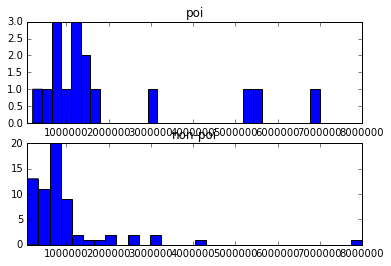

[-412500.0 1912500.0]      8000000.000     LAVORATO JOHN J
[-412500.0 1912500.0]      7000000.000 POI LAY KENNETH L
[-412500.0 1912500.0]      5600000.000 POI SKILLING JEFFREY K
[-412500.0 1912500.0]      5249999.000 POI BELDEN TIMOTHY N
[-412500.0 1912500.0]      4175000.000     ALLEN PHILLIP K
[-412500.0 1912500.0]      3100000.000     KITCHEN LOUISE
[-412500.0 1912500.0]      3000000.000 POI DELAINEY DAVID W
[-412500.0 1912500.0]      3000000.000 POI DELAINEY DAVID W
[-412500.0 1912500.0]      3000000.000     WHALLEY LAWRENCE G
[-412500.0 1912500.0]      3000000.000     WHALLEY LAWRENCE G
[-412500.0 1912500.0]      2600000.000     MCMAHON JEFFREY
[-412500.0 1912500.0]      2500000.000     FALLON JAMES B
[-412500.0 1912500.0]      2000000.000     SHANKMAN JEFFREY A
[-412500.0 1912500.0]      2000000.000     SHANKMAN JEFFREY A
[-412500.0 1912500.0]      2000000.000     FREVERT MARK A
[-412500.0 1912500.0]      2000000.000     FREVERT MARK A


In [37]:
explore('bonus')

missing values 107 of 144 (74.3%)
min 7961.0 max 6426990.0
25% 85430.0 50% 227449.0 75% 875307.0
mean 867118.810811 std 1279692.05864


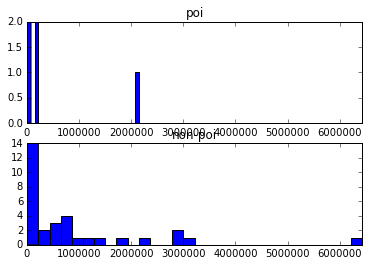

[-957366.5 1412264.5]      6426990.000     FREVERT MARK A
[-957366.5 1412264.5]      3131860.000     HORTON STANLEY C
[-957366.5 1412264.5]      2964506.000     HUMPHREY GENE E
[-957366.5 1412264.5]      2869717.000     ALLEN PHILLIP K
[-957366.5 1412264.5]      2157527.000     HAEDICKE MARK E
[-957366.5 1412264.5]      2144013.000 POI BELDEN TIMOTHY N
[-957366.5 1412264.5]      1848227.000     MEYER ROCKFORD G


In [38]:
explore('deferral_payments')

missing values 95 of 144 (66.0%)
min -3504386.0 max -833.0
25% -583325.0 50% -144062.0 75% -38346.0
mean -571283.489796 std 925127.788811


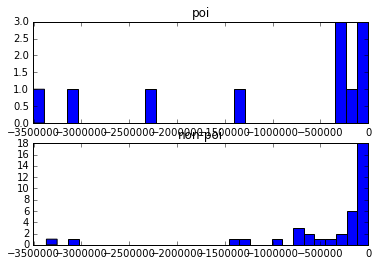

-1284000.000 [-961530.5 673406.5]          DERRICK JR. JAMES V
-1386055.000 [-961530.5 673406.5]      POI FASTOW ANDREW S
-1386055.000 [-961530.5 673406.5]      POI FASTOW ANDREW S
-1386055.000 [-961530.5 673406.5]          BAXTER JOHN C
-1386055.000 [-961530.5 673406.5]          BAXTER JOHN C
-2334434.000 [-961530.5 673406.5]      POI BELDEN TIMOTHY N
-3081055.000 [-961530.5 673406.5]          ALLEN PHILLIP K
-3117011.000 [-961530.5 673406.5]      POI HANNON KEVIN P
-3367011.000 [-961530.5 673406.5]          FREVERT MARK A
-3504386.000 [-961530.5 673406.5]      POI RICE KENNETH D


In [39]:
explore('deferred_income')

missing values 129 of 144 (89.6%)
min 17500.0 max 125034.0
25% 100017.0 50% 103750.0 75% 110895.0
mean 93234.4666667 std 32190.251172


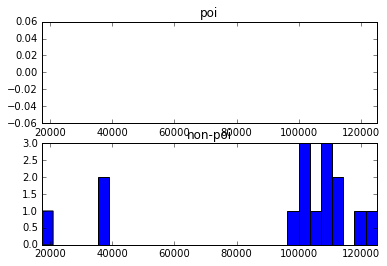

[87433.0 120067.0]          125034.000     SAVAGE FRANK
   38346.000 [87433.0 120067.0]            MEYER JEROME J
   36666.000 [87433.0 120067.0]            URQUHART JOHN A
   17500.000 [87433.0 120067.0]            POWERS WILLIAM


In [40]:
explore('director_fees')

missing values 44 of 144 (30.6%)
min 9803.0 max 34348384.0
25% 570128.75 50% 1310813.5 75% 2544450.0
mean 3117640.0 std 5629563.29093


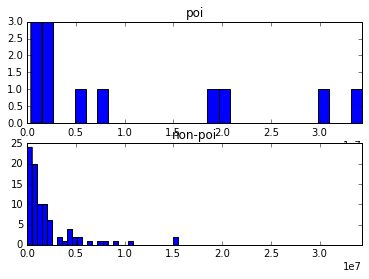

[-1650668.375 4272295.375] 34348384.000 POI LAY KENNETH L
[-1650668.375 4272295.375] 30766064.000 POI HIRKO JOSEPH
[-1650668.375 4272295.375] 19794175.000 POI RICE KENNETH D
[-1650668.375 4272295.375] 19250000.000 POI SKILLING JEFFREY K
[-1650668.375 4272295.375] 15456290.000     BHATNAGAR SANJAY
[-1650668.375 4272295.375] 15364167.000     PAI LOU L
[-1650668.375 4272295.375] 10433518.000     FREVERT MARK A
[-1650668.375 4272295.375]  8831913.000     DERRICK JR. JAMES V
[-1650668.375 4272295.375]  8308552.000 POI YEAGER F SCOTT
[-1650668.375 4272295.375]  8191755.000     DIMICHELE RICHARD G
[-1650668.375 4272295.375]  7509039.000     REDMOND BRIAN L
[-1650668.375 4272295.375]  6680544.000     BAXTER JOHN C
[-1650668.375 4272295.375]  5538001.000 POI HANNON KEVIN P
[-1650668.375 4272295.375]  5266578.000     OVERDYKE JR JERE C
[-1650668.375 4272295.375]  5210569.000     HORTON STANLEY C
[-1650668.375 4272295.375]  5127155.000     CHRISTODOULOU DIOMEDES
[-1650668.375 4272295.375]  489034

In [41]:
explore('exercised_stock_options')

missing values 48 of 144 (33.3%)
min 148.0 max 228763.0
25% 22140.5 50% 46547.5 75% 79252.25
mean 54533.3125 std 46468.8193656


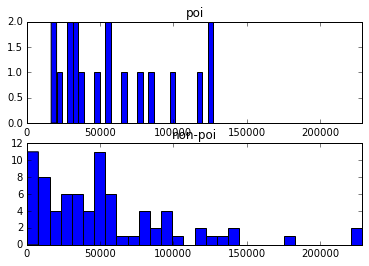

[-39120.125 132215.125]     228763.000     MCCLELLAN GEORGE
[-39120.125 132215.125]     228656.000     URQUHART JOHN A
[-39120.125 132215.125]     178979.000     SHANKMAN JEFFREY A
[-39120.125 132215.125]     137864.000     BHATNAGAR SANJAY
[-39120.125 132215.125]     137767.000     SHAPIRO RICHARD S
[-39120.125 132215.125]     137108.000     MCMAHON JEFFREY


In [42]:
explore('expenses')

missing values 141 of 144 (97.9%)
min 400000.0 max 81525000.0
25% 1200000.0 50% 2000000.0 75% 41762500.0
mean 27975000.0 std 37871201.6797


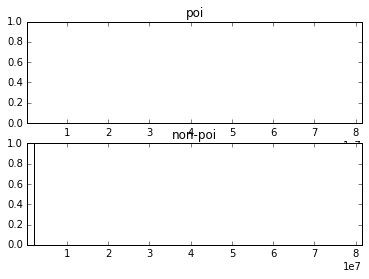

[-58843750.0 62843750.0]  81525000.000 POI LAY KENNETH L


In [43]:
explore('loan_advances')

missing values 79 of 144 (54.9%)
min 69223.0 max 5145434.0
25% 275000.0 50% 422158.0 75% 831809.0
mean 746491.2 std 856253.866853


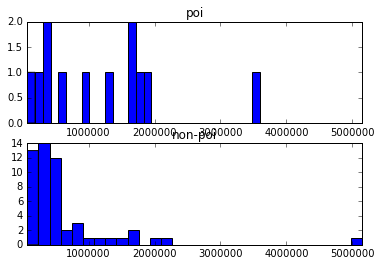

[-413055.5 1257371.5]      5145434.000     MARTIN AMANDA K
[-413055.5 1257371.5]      3600000.000 POI LAY KENNETH L
[-413055.5 1257371.5]      2234774.000     ECHOLS JOHN B
[-413055.5 1257371.5]      2035380.000     LAVORATO JOHN J
[-413055.5 1257371.5]      1920000.000 POI SKILLING JEFFREY K
[-413055.5 1257371.5]      1736055.000 POI FASTOW ANDREW S
[-413055.5 1257371.5]      1725545.000     MULLER MARK S
[-413055.5 1257371.5]      1617011.000 POI RICE KENNETH D
[-413055.5 1257371.5]      1617011.000 POI RICE KENNETH D
[-413055.5 1257371.5]      1617011.000 POI RICE KENNETH D
[-413055.5 1257371.5]      1617011.000 POI HANNON KEVIN P
[-413055.5 1257371.5]      1617011.000 POI HANNON KEVIN P
[-413055.5 1257371.5]      1617011.000 POI HANNON KEVIN P
[-413055.5 1257371.5]      1617011.000     FREVERT MARK A
[-413055.5 1257371.5]      1617011.000     FREVERT MARK A
[-413055.5 1257371.5]      1617011.000     FREVERT MARK A
[-413055.5 1257371.5]      1586055.000     BAXTER JOHN C
[-413055.5 

In [44]:
explore('long_term_incentive')

missing values 54 of 144 (37.5%)
min 2.0 max 10359729.0
25% 1197.0 50% 38570.0 75% 344027.0
mean 470061.033333 std 1396941.62285


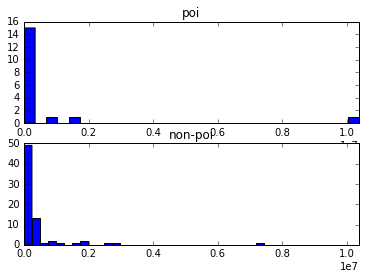

[-475675.0 552815.0]      10359729.000 POI LAY KENNETH L
[-475675.0 552815.0]       7427621.000     FREVERT MARK A
[-475675.0 552815.0]       2818454.000     MARTIN AMANDA K
[-475675.0 552815.0]       2660303.000     BAXTER JOHN C
[-475675.0 552815.0]       1852186.000     SHERRIFF JOHN R
[-475675.0 552815.0]       1829457.000     PAI LOU L
[-475675.0 552815.0]       1573324.000 POI SHELBY REX
[-475675.0 552815.0]       1553729.000     IZZO LAWRENCE L
[-475675.0 552815.0]       1085463.000     WHITE JR THOMAS E
[-475675.0 552815.0]        907502.000 POI KOPPER MICHAEL J
[-475675.0 552815.0]        864523.000     BANNANTINE JAMES M
[-475675.0 552815.0]        819288.000     GOLD JOSEPH
[-475675.0 552815.0]        680833.000     GRAY RODNEY


In [45]:
explore('other')

missing values 34 of 144 (23.6%)
min 32460.0 max 14761694.0
25% 254018.0 50% 451740.0 75% 1002369.75
mean 1184748.17273 std 2206907.91665


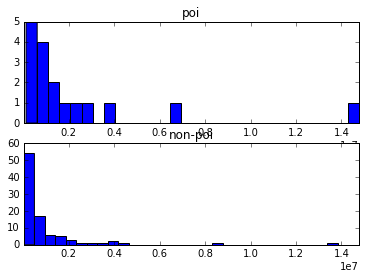

[-670787.625 1574267.625] 14761694.000 POI LAY KENNETH L
[-670787.625 1574267.625] 13847074.000     WHITE JR THOMAS E
[-670787.625 1574267.625]  8453763.000     PAI LOU L
[-670787.625 1574267.625]  6843672.000 POI SKILLING JEFFREY K
[-670787.625 1574267.625]  4188667.000     FREVERT MARK A
[-670787.625 1574267.625]  4131594.000     KEAN STEVEN J
[-670787.625 1574267.625]  3942714.000     BAXTER JOHN C
[-670787.625 1574267.625]  3654808.000     IZZO LAWRENCE L
[-670787.625 1574267.625]  3576206.000 POI YEAGER F SCOTT
[-670787.625 1574267.625]  2796177.000     WHALLEY LAWRENCE G
[-670787.625 1574267.625]  2748364.000 POI RICE KENNETH D
[-670787.625 1574267.625]  2604490.000     BHATNAGAR SANJAY
[-670787.625 1574267.625]  2502063.000 POI CAUSEY RICHARD A
[-670787.625 1574267.625]  2217299.000     HAUG DAVID L
[-670787.625 1574267.625]  2046079.000     HORTON STANLEY C
[-670787.625 1574267.625]  2041016.000     OVERDYKE JR JERE C
[-670787.625 1574267.625]  1794412.000 POI FASTOW ANDREW S
[

In [46]:
explore('restricted_stock')

missing values 127 of 144 (88.2%)
min -2604490.0 max -32460.0
25% -409554.0 50% -153686.0 75% -82782.0
mean -445693.411765 std 672734.425329


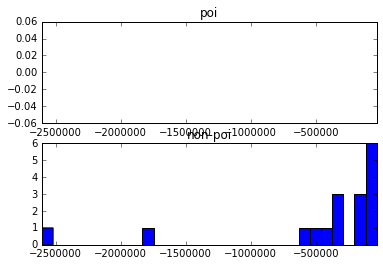

-1787380.000 [-643844.0 336472.0]          DERRICK JR. JAMES V
-2604490.000 [-643844.0 336472.0]          BHATNAGAR SANJAY


In [47]:
explore('restricted_stock_deferred')

missing values 50 of 144 (34.7%)
min 477.0 max 1111258.0
25% 211802.0 50% 258741.0 75% 308606.5
mean 284087.542553 std 176186.40936


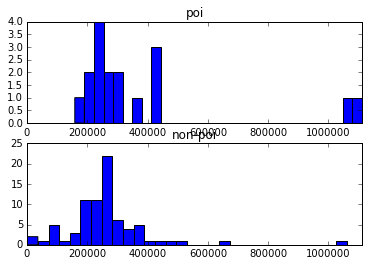

[113534.25 403947.75]      1111258.000 POI SKILLING JEFFREY K
[113534.25 403947.75]      1072321.000 POI LAY KENNETH L
[113534.25 403947.75]      1060932.000     FREVERT MARK A
[113534.25 403947.75]       655037.000     PICKERING MARK R
[113534.25 403947.75]       510364.000     WHALLEY LAWRENCE G
[113534.25 403947.75]       492375.000     DERRICK JR. JAMES V
[113534.25 403947.75]       440698.000 POI FASTOW ANDREW S
[113534.25 403947.75]       428780.000     SHERRIFF JOHN R
[113534.25 403947.75]       420636.000 POI RICE KENNETH D
[113534.25 403947.75]       415189.000 POI CAUSEY RICHARD A
[113534.25 403947.75]       404338.000     KEAN STEVEN J
   96840.000 [113534.25 403947.75]         REDMOND BRIAN L
   94941.000 [113534.25 403947.75]         OVERDYKE JR JERE C
   85274.000 [113534.25 403947.75]         IZZO LAWRENCE L
   80818.000 [113534.25 403947.75]         BAZELIDES PHILIP J
   76399.000 [113534.25 403947.75]         REYNOLDS LAWRENCE
   63744.000 [113534.25 403947.75]        

In [48]:
explore('salary')

missing values 21 of 144 (14.6%)
min 148.0 max 103559793.0
25% 377387.5 50% 1099100.0 75% 2064694.5
mean 2516459.26016 std 9417357.59503


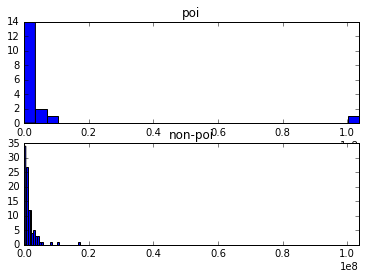

[-1431860.5 3630060.5]    103559793.000 POI LAY KENNETH L
[-1431860.5 3630060.5]    17252530.000     FREVERT MARK A
[-1431860.5 3630060.5]    10425757.000     LAVORATO JOHN J
[-1431860.5 3630060.5]     8682716.000 POI SKILLING JEFFREY K
[-1431860.5 3630060.5]     8407016.000     MARTIN AMANDA K
[-1431860.5 3630060.5]     5634343.000     BAXTER JOHN C
[-1431860.5 3630060.5]     5501630.000 POI BELDEN TIMOTHY N
[-1431860.5 3630060.5]     4747979.000 POI DELAINEY DAVID W
[-1431860.5 3630060.5]     4677574.000     WHALLEY LAWRENCE G
[-1431860.5 3630060.5]     4484442.000     ALLEN PHILLIP K
[-1431860.5 3630060.5]     4335388.000     SHERRIFF JOHN R
[-1431860.5 3630060.5]     4099771.000     MCMAHON JEFFREY
[-1431860.5 3630060.5]     3859065.000     HAEDICKE MARK E
[-1431860.5 3630060.5]     3676340.000     FALLON JAMES B


In [49]:
explore('total_payments')

missing values 19 of 144 (13.2%)
min 28798.0 max 49110078.0
25% 495633.0 50% 1110705.0 75% 3064208.0
mean 3476076.088 std 6587987.65245


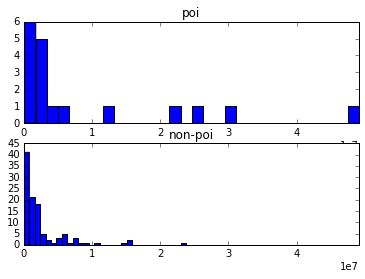

[-2742157.5 4963567.5]    49110078.000 POI LAY KENNETH L
[-2742157.5 4963567.5]    30766064.000 POI HIRKO JOSEPH
[-2742157.5 4963567.5]    26093672.000 POI SKILLING JEFFREY K
[-2742157.5 4963567.5]    23817930.000     PAI LOU L
[-2742157.5 4963567.5]    22542539.000 POI RICE KENNETH D
[-2742157.5 4963567.5]    15456290.000     BHATNAGAR SANJAY
[-2742157.5 4963567.5]    15144123.000     WHITE JR THOMAS E
[-2742157.5 4963567.5]    14622185.000     FREVERT MARK A
[-2742157.5 4963567.5]    11884758.000 POI YEAGER F SCOTT
[-2742157.5 4963567.5]    10623258.000     BAXTER JOHN C
[-2742157.5 4963567.5]     8831913.000     DERRICK JR. JAMES V
[-2742157.5 4963567.5]     8317782.000     DIMICHELE RICHARD G
[-2742157.5 4963567.5]     7890324.000     REDMOND BRIAN L
[-2742157.5 4963567.5]     7307594.000     OVERDYKE JR JERE C
[-2742157.5 4963567.5]     7256648.000     HORTON STANLEY C
[-2742157.5 4963567.5]     6678735.000     ELLIOTT STEVEN
[-2742157.5 4963567.5]     6391065.000 POI HANNON KEVIN

In [50]:
explore('total_stock_value')

### Explore email features

missing values 58 of 144 (40.3%)
min 12.0 max 14368.0
25% 22.75 50% 41.0 75% 145.5
mean 608.790697674 std 1830.29896602


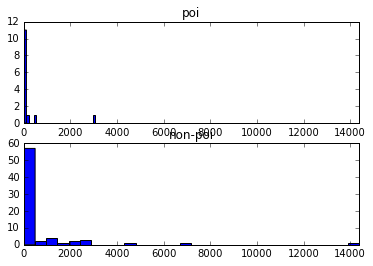

[-143.125 225.125]           14368.000     KAMINSKI WINCENTY J
[-143.125 225.125]            6759.000     KEAN STEVEN J
[-143.125 225.125]            4343.000     BECK SALLY W
[-143.125 225.125]            3069.000 POI DELAINEY DAVID W
[-143.125 225.125]            2742.000     MCCONNELL MICHAEL S
[-143.125 225.125]            2681.000     SHANKMAN JEFFREY A
[-143.125 225.125]            2585.000     LAVORATO JOHN J
[-143.125 225.125]            2195.000     ALLEN PHILLIP K
[-143.125 225.125]            1941.000     HAEDICKE MARK E
[-143.125 225.125]            1728.000     KITCHEN LOUISE
[-143.125 225.125]            1215.000     SHAPIRO RICHARD S
[-143.125 225.125]            1073.000     HORTON STANLEY C
[-143.125 225.125]            1061.000     HAYSLETT RODERICK J
[-143.125 225.125]            1053.000     BUY RICHARD B
[-143.125 225.125]             909.000     DERRICK JR. JAMES V
[-143.125 225.125]             556.000     WHALLEY LAWRENCE G
[-143.125 225.125]             484.000

In [51]:
explore('from_messages')

missing values 58 of 144 (40.3%)
min 0.0 max 528.0
25% 10.0 50% 35.0 75% 72.25
mean 64.8953488372 std 86.4720722586


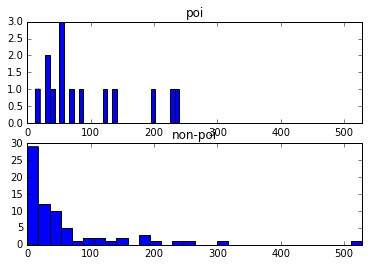

[-58.375 128.375]              528.000     LAVORATO JOHN J
[-58.375 128.375]              305.000     DIETRICH JANET R
[-58.375 128.375]              251.000     KITCHEN LOUISE
[-58.375 128.375]              242.000     FREVERT MARK A
[-58.375 128.375]              240.000 POI COLWELL WESLEY
[-58.375 128.375]              228.000 POI BELDEN TIMOTHY N
[-58.375 128.375]              204.000     REDMOND BRIAN L
[-58.375 128.375]              199.000 POI CALGER CHRISTOPHER F
[-58.375 128.375]              188.000     DONAHUE JR JEFFREY M
[-58.375 128.375]              186.000     WHALLEY LAWRENCE G
[-58.375 128.375]              180.000     HAEDICKE MARK E
[-58.375 128.375]              156.000     BUY RICHARD B
[-58.375 128.375]              144.000     BECK SALLY W
[-58.375 128.375]              140.000 POI BOWEN JR RAYMOND M
[-58.375 128.375]              140.000 POI BOWEN JR RAYMOND M
[-58.375 128.375]              140.000     KEAN STEVEN J
[-58.375 128.375]              140.000     KE

In [52]:
explore('from_poi_to_this_person')

missing values 58 of 144 (40.3%)
min 0.0 max 609.0
25% 1.0 50% 8.0 75% 24.75
mean 41.2325581395 std 99.4895897813


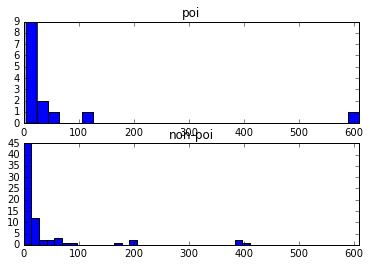

[-27.625 43.625]               609.000 POI DELAINEY DAVID W
[-27.625 43.625]               411.000     LAVORATO JOHN J
[-27.625 43.625]               387.000     KEAN STEVEN J
[-27.625 43.625]               386.000     BECK SALLY W
[-27.625 43.625]               194.000     MCCONNELL MICHAEL S
[-27.625 43.625]               194.000     MCCONNELL MICHAEL S
[-27.625 43.625]               194.000     KITCHEN LOUISE
[-27.625 43.625]               194.000     KITCHEN LOUISE
[-27.625 43.625]               171.000     KAMINSKI WINCENTY J
[-27.625 43.625]               108.000 POI BELDEN TIMOTHY N
[-27.625 43.625]                83.000     SHANKMAN JEFFREY A
[-27.625 43.625]                71.000     BUY RICHARD B
[-27.625 43.625]                65.000     SHAPIRO RICHARD S
[-27.625 43.625]                65.000     SHAPIRO RICHARD S
[-27.625 43.625]                65.000     ALLEN PHILLIP K
[-27.625 43.625]                65.000     ALLEN PHILLIP K
[-27.625 43.625]                61.000     H

In [53]:
explore('from_this_person_to_poi')

missing values 58 of 144 (40.3%)
min 2.0 max 5521.0
25% 249.75 50% 740.5 75% 1888.25
mean 1176.46511628 std 1171.44692579


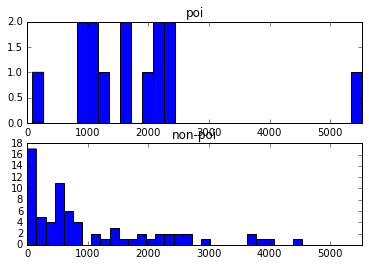

[-1717.25 3198.25]            5521.000 POI BELDEN TIMOTHY N
[-1717.25 3198.25]            4527.000     SHAPIRO RICHARD S
[-1717.25 3198.25]            3962.000     LAVORATO JOHN J
[-1717.25 3198.25]            3920.000     WHALLEY LAWRENCE G
[-1717.25 3198.25]            3669.000     KITCHEN LOUISE
[-1717.25 3198.25]            3639.000     KEAN STEVEN J


In [54]:
explore('shared_receipt_with_poi')

missing values 58 of 144 (40.3%)
min 57.0 max 15149.0
25% 541.25 50% 1211.0 75% 2634.75
mean 2073.86046512 std 2567.64137159


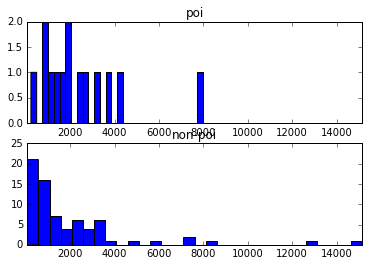

[-1929.25 4351.25]           15149.000     SHAPIRO RICHARD S
[-1929.25 4351.25]           12754.000     KEAN STEVEN J
[-1929.25 4351.25]            8305.000     KITCHEN LOUISE
[-1929.25 4351.25]            7991.000 POI BELDEN TIMOTHY N
[-1929.25 4351.25]            7315.000     BECK SALLY W
[-1929.25 4351.25]            7259.000     LAVORATO JOHN J
[-1929.25 4351.25]            6019.000     WHALLEY LAWRENCE G
[-1929.25 4351.25]            4607.000     KAMINSKI WINCENTY J


In [55]:
explore('to_messages')

## Create new email features

I am highly sceptical of the poi-related email features. Because if we have a fresh data set, we do not know any poi and thus cannot assign reasonable values to these features. But if we envisage an incremental approach, i. e. we do already know some poi and try to find some more, then we can use such features. Here, I create new features based on the poi-related features.

In [56]:
def fraction(subset, all):
    fraction = 0.0
    if all != 'NaN' and subset != 'NaN':
        fraction = float(subset) / float(all)
    return fraction

for data in data_dict.values():
    data['fraction_to_poi'] = fraction(data['from_this_person_to_poi'], data['from_messages'])
    data['fraction_from_poi'] = fraction(data['from_poi_to_this_person'], data['to_messages'])

missing values 0 of 144 (0.0%)
min 0.0 max 1.0
25% 0.0 50% 0.0 75% 0.198826979472
mean 0.10992202398 std 0.185288112201


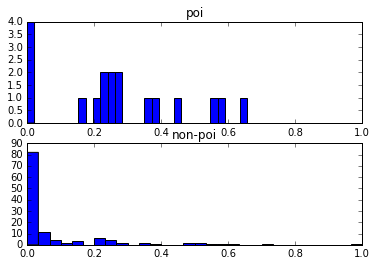

[-0.298240469208 0.298240469208]        1.000     HUMPHREY GENE E
[-0.298240469208 0.298240469208]        0.720     SHERRICK JEFFREY B
[-0.298240469208 0.298240469208]        0.656 POI HANNON KEVIN P
[-0.298240469208 0.298240469208]        0.614     GARLAND C KEVIN
[-0.298240469208 0.298240469208]        0.585 POI RIEKER PAULA H
[-0.298240469208 0.298240469208]        0.579     TILNEY ELIZABETH A
[-0.298240469208 0.298240469208]        0.556 POI BOWEN JR RAYMOND M
[-0.298240469208 0.298240469208]        0.542     MCMAHON JEFFREY
[-0.298240469208 0.298240469208]        0.500     FITZGERALD JAY L
[-0.298240469208 0.298240469208]        0.500     FITZGERALD JAY L
[-0.298240469208 0.298240469208]        0.500     DONAHUE JR JEFFREY M
[-0.298240469208 0.298240469208]        0.500     DONAHUE JR JEFFREY M
[-0.298240469208 0.298240469208]        0.493     FALLON JAMES B
[-0.298240469208 0.298240469208]        0.467     CARTER REBECCA C
[-0.298240469208 0.298240469208]        0.444 POI LAY KEN

In [57]:
explore('fraction_to_poi')

missing values 0 of 144 (0.0%)
min 0.0 max 0.217341040462
25% 0.0 50% 0.00495152952689 75% 0.0299180746649
mean 0.0226723343813 std 0.0362905116719


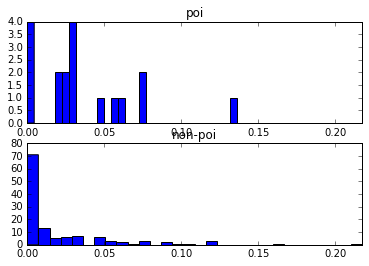

[-0.0399255824704 0.0498286415242]        0.217     DONAHUE JR JEFFREY M
[-0.0399255824704 0.0498286415242]        0.161     DEFFNER JOSEPH M
[-0.0399255824704 0.0498286415242]        0.137 POI COLWELL WESLEY
[-0.0399255824704 0.0498286415242]        0.122     REDMOND BRIAN L
[-0.0399255824704 0.0498286415242]        0.119     DIETRICH JANET R
[-0.0399255824704 0.0498286415242]        0.117     DURAN WILLIAM D
[-0.0399255824704 0.0498286415242]        0.108     UMANOFF ADAM S
[-0.0399255824704 0.0498286415242]        0.097     JACKSON CHARLENE R
[-0.0399255824704 0.0498286415242]        0.093     CARTER REBECCA C
[-0.0399255824704 0.0498286415242]        0.088     MULLER MARK S
[-0.0399255824704 0.0498286415242]        0.078     HUMPHREY GENE E
[-0.0399255824704 0.0498286415242]        0.077 POI CALGER CHRISTOPHER F
[-0.0399255824704 0.0498286415242]        0.075 POI BOWEN JR RAYMOND M
[-0.0399255824704 0.0498286415242]        0.074     FREVERT MARK A
[-0.0399255824704 0.0498286415242]

In [58]:
explore('fraction_from_poi')

# Save data for model building

In [60]:
import pickle
with open('clean_data.pkl', 'w') as out:
    pickle.dump(data_dict, out)